<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Chapter4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multidimensional scalling**


##วิธีทำ MDS

1.   จะเริ่มจากการคำนวณระยะห่างระหว่างจุดแต่ละจุด ว่ามีระยะห่างเท่าไหร่
2.   เลือกจุดๆนึงเป็นจุดตั้งต้น แล้วมาหาจุดที่มีระยะห่างน้อยไปถึงมาก
3.   โดยเมื่อนำระยะห่างมาเท่ากับจุดต้น ระยะห่างจากจุดอื่นๆต้องมีระยะห่างเท่าเดิมไม่เปลี่ยนแปลง

ข้อดีของมันคือ จะอยู่จุดเดิมเสมอ โดยที่ใช้ความสว่างเป็นตัวอ่านค่าเวลา plot graph

##**Example data Iris**

ลอง plot PCA เพื่อเปรียบเทียบกับ MDS

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [4]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

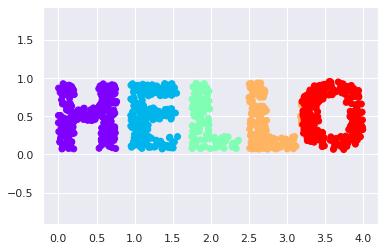

In [3]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

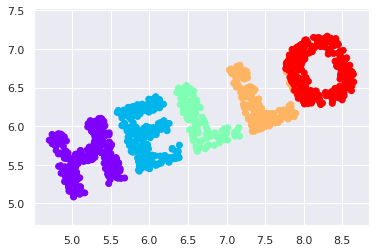

In [5]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [6]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

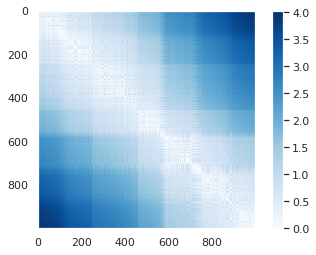

In [7]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

#**Quiz4**

ทำลองทำข้อมูล PCA กับข้อมูล

```
X
```
แล้ว plotgraph และดูว่าผลการกระจายข้อมูลเปลี่ยนไปหรือไม่
